<a href="https://colab.research.google.com/github/gchn24/DS-Notes/blob/main/MEDIUM_TSHIRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
!gdown '1cB3Zy5EsX-tgR_HZpY6ajUW9GoNEmyQs' -O 'medium_tshirt.csv'

Downloading...
From: https://drive.google.com/uc?id=1cB3Zy5EsX-tgR_HZpY6ajUW9GoNEmyQs
To: /content/medium_tshirt.csv
100% 9.80k/9.80k [00:00<00:00, 30.3MB/s]


In [3]:
import numpy as np, pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# 1. Height - Weight Data

In [4]:
df = pd.read_csv("medium_tshirt.csv")

In [5]:
df.shape

(200, 4)

In [6]:
df.head()

,Gender,Height,Weight,T-Shirt
0,Female,64.723877,138.085796,Not Medium
1,Male,67.272171,187.363366,Medium
2,Male,74.520972,216.533191,Not Medium
3,Female,65.880014,131.761443,Not Medium
4,Male,64.846301,157.718438,Medium


In [7]:
df["H/W"] = df.Height/df.Weight

In [8]:
df

,Gender,Height,Weight,T-Shirt,H/W
0,Female,64.723877,138.085796,Not Medium,0.468722
1,Male,67.272171,187.363366,Medium,0.359047
2,Male,74.520972,216.533191,Not Medium,0.344155
3,Female,65.880014,131.761443,Not Medium,0.499995
4,Male,64.846301,157.718438,Medium,0.411152
...,...,...,...,...,...
195,Male,68.746986,195.116244,Not Medium,0.352339
196,Male,69.744829,188.181125,Not Medium,0.370626
197,Female,60.050846,115.656208,Not Medium,0.519219
198,Female,64.694073,135.549114,Not Medium,0.477274


<Axes: xlabel='H/W', ylabel='Count'>

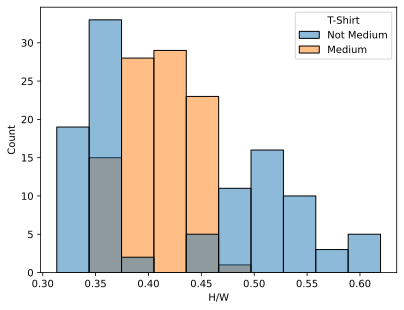

In [9]:
sns.histplot(data = df, x = "H/W", hue = "T-Shirt")

In [10]:
pd.crosstab(df["Gender"],
            df["T-Shirt"])

T-Shirt,Medium,Not Medium
Gender,,
Female,48,51
Male,48,53


In [11]:
df[["Height", "Weight"]].mean()

Height     66.657306
Weight    163.563169
dtype: float64

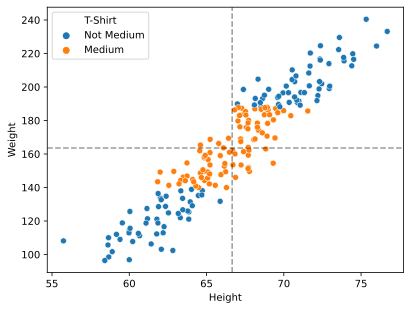

In [12]:
sns.scatterplot(data = df, x = "Height", y = "Weight", hue = "T-Shirt")

plt.axhline(y = df.Weight.mean(), linestyle = '--', color = 'black', alpha = 0.4)

plt.axvline(x = df.Height.mean(), linestyle = '--', color = 'black', alpha = 0.4)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
z_h = (df.Height - df.Height.mean())/(df.Height.std())
z_h

0     -0.476284
1      0.151467
2      1.937148
3     -0.191479
4     -0.446126
         ...   
195    0.514775
196    0.760585
197   -1.627446
198   -0.483626
199   -0.747052
Name: Height, Length: 200, dtype: float64

In [15]:
df[["Height", "Weight"]].head(3)

,Height,Weight
0,64.723877,138.085796
1,67.272171,187.363366
2,74.520972,216.533191


In [16]:
SCALER = StandardScaler()

In [17]:
SCALER.fit_transform(df[["Height", "Weight"]])

array([[-4.77479262e-01, -7.65628544e-01],
       [ 1.51846752e-01,  7.15227214e-01],
       [ 1.94200886e+00,  1.59181882e+00],
       [-1.91959894e-01, -9.55683675e-01],
       [-4.47245295e-01, -1.75641830e-01],
       [-1.97230772e+00, -1.95475058e+00],
       [-4.58133467e-01, -4.18651483e-01],
       [-7.91976300e-01, -9.02972191e-01],
       [ 4.60561338e-01,  7.35961637e-01],
       [ 9.59412696e-01,  1.40146338e+00],
       [ 1.24916971e+00,  1.70423206e+00],
       [ 1.40279626e+00,  1.59723666e+00],
       [ 1.35038215e-01,  1.62845757e-01],
       [-1.84916100e+00, -1.54822042e+00],
       [ 5.59676855e-01,  6.89068514e-01],
       [ 6.95386792e-01,  7.07942156e-01],
       [-7.80393403e-01, -5.20901462e-01],
       [ 3.46776175e-01,  1.48952178e-01],
       [-5.17745605e-01, -5.02878582e-02],
       [-4.41406924e-01, -5.81077696e-01],
       [ 1.40916414e+00,  1.57749371e+00],
       [-6.91538695e-01, -1.14680172e+00],
       [-5.75560112e-02,  1.75573308e-01],
       [-5.

In [18]:
df_std = pd.DataFrame(SCALER.fit_transform(df[["Height", "Weight"]]),  columns = ["Height", "Weight"])

In [19]:
df_std

,Height,Weight
0,-0.477479,-0.765629
1,0.151847,0.715227
2,1.942009,1.591819
3,-0.191960,-0.955684
4,-0.447245,-0.175642
...,...,...
195,0.516067,0.948211
196,0.762494,0.739802
197,-1.631530,-1.439667
198,-0.484840,-0.841859


In [20]:
df_std["T-Shirt"] = df["T-Shirt"].copy()

In [21]:
df_std

,Height,Weight,T-Shirt
0,-0.477479,-0.765629,Not Medium
1,0.151847,0.715227,Medium
2,1.942009,1.591819,Not Medium
3,-0.191960,-0.955684,Not Medium
4,-0.447245,-0.175642,Medium
...,...,...,...
195,0.516067,0.948211,Not Medium
196,0.762494,0.739802,Not Medium
197,-1.631530,-1.439667,Not Medium
198,-0.484840,-0.841859,Not Medium


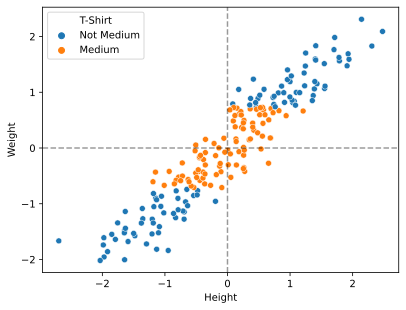

In [22]:
sns.scatterplot(data = df_std, x = "Height",
                y = "Weight", hue = "T-Shirt")
plt.axhline(y = df_std.Weight.mean(), linestyle = '--',
            color = 'black', alpha = 0.4)
plt.axvline(x = df_std.Height.mean(), linestyle = '--',
            color = 'black', alpha = 0.4)

In [23]:
df_std["Hsq"] = df_std["Height"]**2
df_std["Wsq"] = df_std["Weight"]**2

In [24]:
df_std

,Height,Weight,T-Shirt,Hsq,Wsq
0,-0.477479,-0.765629,Not Medium,0.227986,0.586187
1,0.151847,0.715227,Medium,0.023057,0.511550
2,1.942009,1.591819,Not Medium,3.771398,2.533887
3,-0.191960,-0.955684,Not Medium,0.036849,0.913331
4,-0.447245,-0.175642,Medium,0.200028,0.030850
...,...,...,...,...,...
195,0.516067,0.948211,Not Medium,0.266325,0.899105
196,0.762494,0.739802,Not Medium,0.581397,0.547307
197,-1.631530,-1.439667,Not Medium,2.661889,2.072642
198,-0.484840,-0.841859,Not Medium,0.235069,0.708727


<Axes: xlabel='Hsq', ylabel='Wsq'>

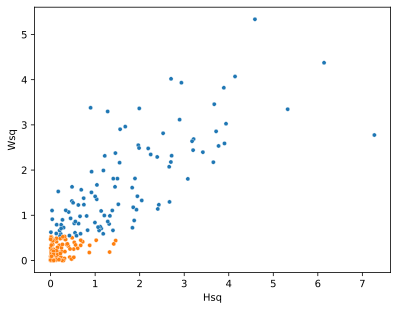

In [25]:
sns.scatterplot(data = df_std, x = "Hsq", y = "Wsq",
                hue = "T-Shirt", size = 0.05,
                legend = False)